In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!wget -nc https://raw.githubusercontent.com/Nadiam75/DeepLearning_HW_2/main/imageNetLabels.py

File ‘imageNetLabels.py’ already there; not retrieving.



In [ ]:

import tensorflow as tf  
# Display the version
print(tf.__version__)    
import  imageNetLabels
# other imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, MaxPooling2D, Concatenate, GlobalMaxPooling2D, GlobalAveragePooling2D, \
    Lambda, Multiply, LSTM, Bidirectional, PReLU, MaxPooling1D
# from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.applications.nasnet import NASNetMobile, NASNetLarge, preprocess_input

from keras.callbacks import ModelCheckpoint   
import time
from sklearn.model_selection import train_test_split

2.7.0


In [ ]:
dictionary = imageNetLabels.IMAGENET_CLASSES

In [ ]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()


In [ ]:
# base_model_NASNetMobile = NASNetMobile(weights="imagenet")


In [ ]:
# base_model_NASNetLarge = NASNetLarge(weights="imagenet")  ## (331, 331, 3) 

In [ ]:
# base_model_NASNetMobile.summary() ## z

In [ ]:
# i = tf.keras.layers.Input([None, None, 3], dtype = tf.uint8)
# core = tf.keras.applications.MobileNet()
# x = core(x)
# model = tf.keras.Model(inputs=[i], outputs=[x])

# image = tf.image.decode_png(tf.io.read_file('file.png'))
# result = model(image)

In [ ]:

def get_model_classif_nasnet():
    inputs = Input((224, 224, 3))
    xx = tf.cast(inputs, tf.float32)
    xxx = tf.keras.applications.nasnet.preprocess_input(xx)

    base_model = NASNetMobile(include_top=False, input_shape=(224, 224, 3) , weights = 'imagenet' )
    x = base_model(xxx)
    out3 = GlobalAveragePooling2D()(x)
    # out2 = GlobalAveragePooling2D()(x)
    # out3 = Flatten()(gmp)
    # out = Concatenate(axis=-1)([out1, out2, out3])
    # out2 = Dense(1000, activation=tf.keras.activations.relu, name="3_")(out3)
    # out2 = Dropout(0.5)(out2)

    out = Dense(1000, activation=tf.keras.activations.softmax, name="1_")(out3)

    model = Model(inputs, out)

    for l in model.layers[:-2]:
    #print(l)
      l.trainable = False
    model.summary(  )

    model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss=tf.keras.losses.binary_crossentropy, metrics=['acc'])

    return model

In [ ]:
model = get_model_classif_nasnet()


Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_42 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 tf.cast_21 (TFOpLambda)     (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv_21 (TFOpLam  (None, 224, 224, 3)      0         
 bda)                                                            
                                                                 
 tf.math.subtract_21 (TFOpLa  (None, 224, 224, 3)      0         
 mbda)                                                           
                                                                 
 NASNet (Functional)         (None, 7, 7, 1056)        4269716   
                                                                 
 global_average_pooling2d_5   (None, 1056)             0  

In [ ]:
# model.fit_generator(train_generator,steps_per_epoch=5176//128,validation_data=valid_generator,validation_steps=1293//128,epochs=2)

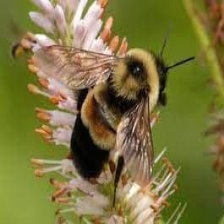

In [ ]:
import cv2
img = cv2.imread('bee1.jpg' , cv2.IMREAD_UNCHANGED)
from google.colab.patches import cv2_imshow
# cv2_imshow(img)
img.shape
dim = (224, 224 )
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

resized.shape
cv2_imshow(resized)


In [ ]:
# indices = np.where(Y_train == 2)

In [ ]:
# y_train_bird = Y_train[indices]
# x_train_bird = X_train[indices]

y_book = 309
y_book_hot = tf.keras.utils.to_categorical(
    y_book, num_classes=1000, dtype='float32'
)
x_book = resized

In [ ]:
y_book_hot = np.reshape(y_book_hot , (1,1000))
x_book = np.reshape( x_book , (1,224,224,3))

In [ ]:
BS=32
EPOCHS = 30
h5_path = "transferred_model.h5"
# augmented = np.empty((100 , 224 , 224 , 3))
aug = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=20, zoom_range=0.15,
	width_shift_range=0.2, height_shift_range=0.1, shear_range=0.15,
	horizontal_flip=True,  fill_mode="nearest")
generator = aug.flow(x_book, y_book_hot ,batch_size=BS )
history = model.fit_generator( generator,   epochs = EPOCHS)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/30
1/1 [==============================] - 17s 17s/step - loss: 0.6949 - acc: 0.0000e+00
Epoch 2/30
1/1 [==============================] - 0s 109ms/step - loss: 0.6896 - acc: 0.0000e+00
Epoch 3/30
1/1 [==============================] - 0s 124ms/step - loss: 0.6748 - acc: 0.0000e+00
Epoch 4/30
1/1 [==============================] - 0s 122ms/step - loss: 0.6554 - acc: 0.0000e+00
Epoch 5/30
1/1 [==============================] - 0s 118ms/step - loss: 0.6537 - acc: 0.0000e+00
Epoch 6/30
1/1 [==============================] - 0s 127ms/step - loss: 0.6269 - acc: 0.0000e+00
Epoch 7/30
1/1 [==============================] - 0s 115ms/step - loss: 0.6179 - acc: 0.0000e+00
Epoch 8/30
1/1 [==============================] - 0s 116ms/step - loss: 0.6187 - acc: 0.0000e+00
Epoch 9/30
1/1 [==============================] - 0s 120ms/step - loss: 0.5924 - acc: 0.0000e+00
Epoch 10/30
1/1 [==============================] - 0s 109ms/step - loss: 0.5884 - acc: 0.0000e+00
Epoch 11/30
1/1 [=============

In [ ]:
np.argmax(model.predict(x_book))

309

In [ ]:
arr = model.predict(x_book).reshape((1000,))



In [ ]:
arr.argsort()[-3:][::-1]

array([309, 780, 293])

In [ ]:
arr[309]

0.0041390797

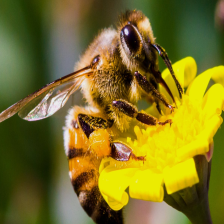

array([504, 220, 773])

In [ ]:
import cv2
img = cv2.imread('bee2.jpg' , cv2.IMREAD_UNCHANGED)
from google.colab.patches import cv2_imshow
# cv2_imshow(img)
img.shape
dim = (224, 224 )
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(resized)

resized = np.reshape( resized , (1,224,224,3))
# resized.shape
arr = model.predict(resized).reshape((1000,))
arr.argsort()[-3:][::-1]

In [ ]:
arr[573]

0.0009545278

banjo 420
fly 308
bee 309

#other

In [ ]:
# ! rm -d -f -r rm augmented


In [ ]:
# !mkdir augmented

# for i in range(1):
#   j = 0
#   for batch in aug.flow(x_book, y_book_hot ,batch_size=BS, save_to_dir = '/content/augmented' , save_prefix='bird_', save_format='jpeg'):
#     j +=1
#     if j > 5:
#       break

In [ ]:

# i= 0
# for batch in :
#     batch
    # cv2_imshow(batch[i])
    # augmented[i , : , : , : ] = batch[0]
    # # batch
    # i += 1
    # if i > 9:
    #     break  


# dataAugmentaion =tf.keras.preprocessing.image.ImageDataGenerator(rotation_range = 30, zoom_range = 0.20, 
# fill_mode = "nearest", shear_range = 0.20, horizontal_flip = True, 
# width_shift_range = 0.1, height_shift_range = 0.1)

# r = dataAugmentaion.flow(x_book, y_book_hot ,batch_size=BS, save_to_dir = '/content/augmented' , save_prefix='bird_', save_format='jpeg')



# model.fit(dataAugmentaion.flow(x_book, y_book_hot, batch_size = 32, ),
#  validation_data = (x_book, y_book_hot), steps_per_epoch = 20,
#  epochs = 10)




# training the model
# history = model.fit_generator(augmented,   steps_per_epoch = len(x_book) // BS,  epochs = 10)

# history = model.fit_generator(
#     data_gen(augmented, y_book_hot, BS, augment=True),
#     validation_data=data_gen(val, id_label_map, batch_size),
#     epochs=6, verbose=1,
#     callbacks=[checkpoint],
#     steps_per_epoch=len(train) // batch_size,
#     validation_steps=len(val) // batch_size)


# checkpoint = ModelCheckpoint(h5_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# H = model.fit(aug.flow(x_book, y_book_hot, batch_size=BS),
# 	 steps_per_epoch=len(x_book) // BS,
# 	epochs=EPOCHS)
# history = model.fit_generator(
#     data_gen(train, id_label_map, batch_size, augment=True),
#     validation_data=data_gen(val, id_label_map, batch_size),
#     epochs=2, verbose=1,
#     callbacks=[checkpoint],
#     steps_per_epoch=len(train) // batch_size,
#     validation_steps=len(val) // batch_size)
# batch_size=64
# history = model.fit_generator(
#     data_gen(train, id_label_map, batch_size, augment=True),
#     validation_data=data_gen(val, id_label_map, batch_size),
#     epochs=6, verbose=1,
#     callbacks=[checkpoint],
#     steps_per_epoch=len(train) // batch_size,
#     validation_steps=len(val) // batch_size)

# model.load_weights(h5_path)